# Practical 3 : Tree Based Method

## 1.Tree Implementation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [8]:
def loadDataset(filename):
    df = pd.read_csv(filename, index_col=0)
    print(df.head(10))
    input_features=['Age','Income','Limit','Cards','Student','Education']
    target_feature=['Balance']
    target_feature=['Balance']
    df_input=df[input_features+target_feature]
    df_input['Student'].replace('Yes',1,inplace=True)
    df_input['Student'].replace('No',0,inplace=True)
    train=df_input.sample(frac=0.75,random_state=3) #split into train and test
    test=df_input.drop(train.index)
    trainingSet=train.values
    testSet=test.values
    return trainingSet, testSet

training_set,test_set=loadDataset('Credit.csv')


     Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1    14.891   3606     283      2   34         11    Male      No     Yes   
2   106.025   6645     483      3   82         15  Female     Yes     Yes   
3   104.593   7075     514      4   71         11    Male      No      No   
4   148.924   9504     681      3   36         11  Female      No      No   
5    55.882   4897     357      2   68         16    Male      No     Yes   
6    80.180   8047     569      4   77         10    Male      No      No   
7    20.996   3388     259      2   37         12  Female      No      No   
8    71.408   7114     512      2   87          9    Male      No      No   
9    15.125   3300     266      5   66         13  Female      No      No   
10   71.061   6819     491      3   41         19  Female     Yes     Yes   

           Ethnicity  Balance  
1          Caucasian      333  
2              Asian      903  
3              Asian      580  
4              Asian    

/home/osilab1/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
verbose = False
def RSS(splits):
    residual = 0
    for split in splits:
        if(len(split) != 0):
            mean = np.mean([element[-1] for element in split]) #TODO
            residual = residual+ np.sum([ (element[-1] - mean)**2 for element in split]) #TODO
    return residual

In [21]:
split_1 = np.array([[[0,2],[0,8]],[[4,5]]])
RSS_value = RSS(split_1)
if (type(RSS_value) not in [int,float,np.float16,np.float32,np.float64]):
    print("TypeError : check your output")
elif(RSS(split_1) == 18.0):
    print("Your calculations are right, at least on this specific example")
else:
    print("Your calculations are wrong")

Your calculations are right, at least on this specific example


In [11]:
def split(index, value, data):
    left_split = [element for element in data if(element[index]<value)] #TODO condition
    right_split = [element for element in data if(element[index]>=value)] #TODO condition
    return [left_split, right_split]


In [12]:
def split_tester(data): #find optimal split
    optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = -1,-1,float("inf"),[]
    for curr_ind in range(data.shape[1]-1): #for all features
        min_val=np.min(data[:,curr_ind])
        for curr_val in data: #for all values in the data
            if curr_val[curr_ind] == min_val:
                continue
            if(verbose):print("Curr_split : " + str((curr_ind, curr_val[curr_ind])))
            split_result = split(curr_ind, curr_val[curr_ind], data) #TODO (comments : get the current split)
            
            if(verbose):print(split_result)
            residual_value = RSS(split_result)#TODO (comments : get the RSS of the current split)
            
            if(verbose):print("Residual : " + str(residual_value))
            if residual_value < optimal_residual:
                optimal_split_ind, optimal_split_value, optimal_residual, optimal_splits = curr_ind,\
                                                                    curr_val[curr_ind], residual_value, split_result
                
    return optimal_split_ind, optimal_split_value, optimal_splits   # index is feature, value is for crietria, splits is data list.

In [13]:
optimal_ind, optimal_value,_ = split_tester(np.array([[0,-10],[2,4],[4,5]]))
if (optimal_ind != 0):
    print("Your optimal split index is wrong (Careful, Python arrays starts at 0)")
elif(optimal_value != 2):
    print("Your optimal split value is wrong")
else:
    print("You found the good split index and value")

You found the good split index and value


In [14]:
def tree_building(data, min_size): #minimun data size in a split
    if(data.shape[0] > min_size): #building tree until the minimum.
        ind, value, [left, right] = split_tester(data) #using optimal criteria using split_tester
        left, right = np.array(left), np.array(right)
        return [tree_building(left, min_size), tree_building(right, min_size),ind,value]
    else:
        return data  #output is the data in a leaf node.

In [15]:
def predict(tree, input_vector):#recursive until reaching the leaf node.
    if(type(tree[-1]) != np.float64): #when reach the leaf node. tree represent the split data.
        if(len(tree) == 1):  #when number of data is 1
            return(tree[0][-1])   #get the wage in the data
        else:
            return(np.mean([element[-1] for element in tree]))   #average of a leaf node.
    else:  #before reaching leaf node
        left_tree, right_tree, split_ind, split_value = tree #information of the current split 
        if(input_vector[split_ind]<split_value): #which split the input data belong to
            return predict(left_tree, input_vector)
        else:
            return predict(right_tree, input_vector)
    

[ 333.  903.  580.  872. 1350.   89.  654. 1809.    0.  762. 1120.    0.
  902.    0. 1084.  532.  812.  937.  155. 1311.  745.    0.   47.  768.
 1341.    0.    0.  255.    0.    0.  605.    0.    0.  581.  156.  429.
  836.  570.    0. 1099.  283.  108. 1573.    0.  453.  789.    0. 1448.
  336.    0.    0.  230.  308.   52.  653.  573. 1032.  689.  191.   16.
   98.  218.    0.    0.  942.  967.  529.  531.    0.  485. 1677.    0.
  580.  681.  844.  823.  463. 1142.    0.  265. 1361.  474.  194.  926.
    0.  426.  907. 1192.  503.    0. 1405.  962.  712.  710.  578. 1264.
  345.  721.  734.    0.]
test plot


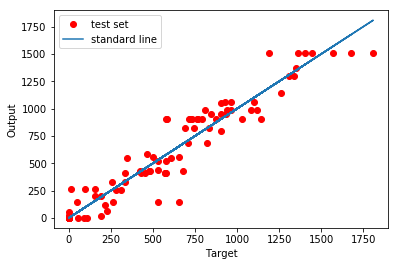

Accuracy: 132.98471924680285


In [16]:
def getAccuracy(testSet, predictions):
    print(np.array(testSet)[:,-1])
    difference=np.sqrt(np.average((np.array(testSet)[:,-1]-np.array(predictions))**2))
    print('test plot')
    plt.plot(np.array(testSet)[:,-1], np.array(predictions),  'ro', label='test set')
    plt.plot(np.array(testSet)[:,-1], np.array(testSet)[:,-1], label='standard line')
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.show()
    return difference


tree = tree_building(training_set,10)
predictions=[]
for employee in test_set:
    predictions.append(predict(tree,employee))
#     print("Predicted : " + str(predict(tree,employee)) + ", Actual : " + str(employee[-1]))
accuracy = getAccuracy(test_set, predictions)
print('Accuracy: ' + repr(accuracy))

     Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1    14.891   3606     283      2   34         11    Male      No     Yes   
2   106.025   6645     483      3   82         15  Female     Yes     Yes   
3   104.593   7075     514      4   71         11    Male      No      No   
4   148.924   9504     681      3   36         11  Female      No      No   
5    55.882   4897     357      2   68         16    Male      No     Yes   
6    80.180   8047     569      4   77         10    Male      No      No   
7    20.996   3388     259      2   37         12  Female      No      No   
8    71.408   7114     512      2   87          9    Male      No      No   
9    15.125   3300     266      5   66         13  Female      No      No   
10   71.061   6819     491      3   41         19  Female     Yes     Yes   

           Ethnicity  Balance  
1          Caucasian      333  
2              Asian      903  
3              Asian      580  
4              Asian    

/home/osilab1/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


[ 333.  903.  580.  872. 1350.   89.  654. 1809.    0.  762. 1120.    0.
  902.    0. 1084.  532.  812.  937.  155. 1311.  745.    0.   47.  768.
 1341.    0.    0.  255.    0.    0.  605.    0.    0.  581.  156.  429.
  836.  570.    0. 1099.  283.  108. 1573.    0.  453.  789.    0. 1448.
  336.    0.    0.  230.  308.   52.  653.  573. 1032.  689.  191.   16.
   98.  218.    0.    0.  942.  967.  529.  531.    0.  485. 1677.    0.
  580.  681.  844.  823.  463. 1142.    0.  265. 1361.  474.  194.  926.
    0.  426.  907. 1192.  503.    0. 1405.  962.  712.  710.  578. 1264.
  345.  721.  734.    0.]
test plot


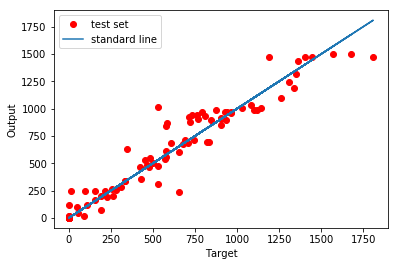

Error(RMSE): 121.47763121872065


In [17]:
import random
from random import randrange

def subsample(dataset, ratio=1):
    sample = list()
    n_sample = round(dataset.shape[0] * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index,:])
    return np.array(sample)

def main():
    repeat=10
    training_set,test_set=loadDataset('Credit.csv')
    predictions=[]
    random.seed(3)
    for i in range(repeat):
        pred_temp=[]
        train_subset=subsample(training_set)
        tree = tree_building(train_subset,10)
        for employee in test_set:
            pred_temp.append(predict(tree,employee))
        predictions.append(pred_temp)
    predictions_avg=np.array(predictions).sum(axis=0)/repeat
    accuracy = getAccuracy(test_set, predictions_avg)
    print('Error(RMSE): ' + repr(accuracy))
    
main()

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import xgboost



dataset=pd.read_csv('Credit.csv')
input_features=['Age','Income','Limit','Cards','Student','Education']
target_feature=['Balance']
target_feature=['Balance']
dataset=dataset[input_features+target_feature]
dataset['Student'].replace('Yes',1,inplace=True)
dataset['Student'].replace('No',0,inplace=True)
x = dataset.drop('Balance', axis = 1).values
y = dataset['Balance'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

def getAccuracy(testSet, predictions):
    print('test plot')
    plt.plot(testSet, predictions,  'ro', label='test set')
    plt.plot(testSet, testSet, label='standard line')
    plt.xlabel("Target")
    plt.ylabel("Output")
    plt.legend()
    plt.show()

    




/home/osilab1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/osilab1/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


test plot


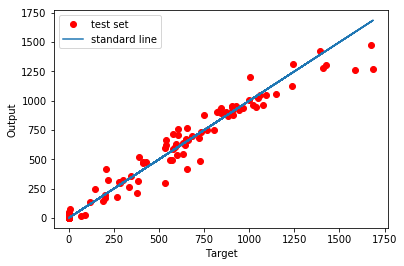

Root Mean Squared Error: 97.47764281105695


In [19]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
getAccuracy(y_test, y_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[15:01:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test plot


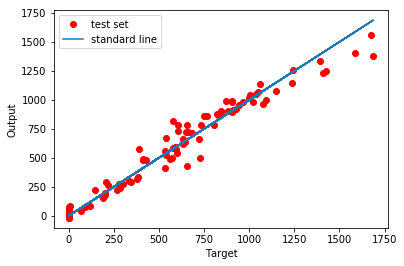

Root Mean Squared Error: 83.36127735144974


In [14]:
xgb_model = xgboost.XGBRegressor(seed=42) 

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
getAccuracy(y_test, y_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
xgboost.XGBRegressor(
    colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

## 2.SKL Implementation, bagging, random forest.

In [33]:
from sklearn import tree, model_selection,ensemble
from sklearn.datasets import load_iris, load_digits
import graphviz
import os
from subprocess import call
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

/home/osilab1/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [34]:
seed = 343

iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=seed)

In [35]:
def show(clf,filename):
    """
    Save the classifier under the /Graph repository as filename + .png, which is created for this purpose, then displays it
    """
    path = "./Graph"
    temp_path = path + "/temp.dot"
    png_path = path+'/'+filename+".png"
    if (not os.path.isdir(path)):
        try:  
            os.mkdir(path)
        except OSError:  
            print ("Creation of the directory %s failed" % path)
        else:  
            print ("Successfully created the directory %s " % path)
    dot_data = tree.export_graphviz(clf, out_file=temp_path, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)
    if(not os.path.exists(png_path)):
        call(['dot', '-Tpng', temp_path, '-o', png_path, '-Gdpi=600'])
    else :
        print("Filename already used")
    os.remove(temp_path)
    img = mpimg.imread(png_path)
    plt.figure(dpi= 800)
    plt.axis("off")
    plt.imshow(img)
    plt.show()

In [36]:
train_feat, test_feat, train_target, test_target = model_selection.train_test_split(iris.data, iris.target, train_size = 0.7)

/home/osilab1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
clf.fit(train_feat,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=343,
            splitter='best')

In [38]:
show(clf,"Trained")

Successfully created the directory ./Graph 


FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [39]:
clf.score(train_feat, train_target)

1.0

In [40]:
clf.score(test_feat, test_target)

0.9555555555555556

In [41]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5 ,random_state=seed)

In [42]:
clf.fit(train_feat,train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=343,
            splitter='best')

In [43]:
show(clf,"No_over")

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [44]:
clf.score(test_feat, test_target)

0.9333333333333333

In [45]:
score_list = []
for i in range(100):
    clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(random_state=seed), n_estimators=i+1)
    clf.fit(train_feat,train_target)
    score_list.append(clf.score(test_feat, test_target))

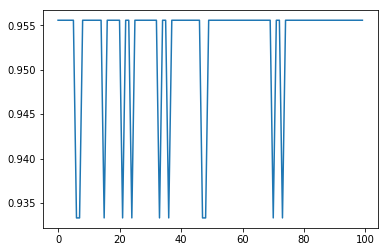

In [46]:
plt.plot(score_list)
plt.show()

In [47]:
train_feat, test_feat, train_target, test_target = model_selection.train_test_split(load_digits().data, load_digits().target, train_size = 0.7)

/home/osilab1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
bagging_score_list = []
forest_score_list = []
for i in range(100):
    bagging_clf = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(random_state=seed), n_estimators=i+1)
    bagging_clf.fit(train_feat,train_target)
    bagging_score_list.append(bagging_clf.score(test_feat, test_target))
    
    forest_classifier = ensemble.RandomForestClassifier(n_estimators=(i+1))
    forest_classifier.fit(train_feat,train_target)
    forest_score_list.append(forest_classifier.score(test_feat, test_target))
    

In [49]:

plt.show()

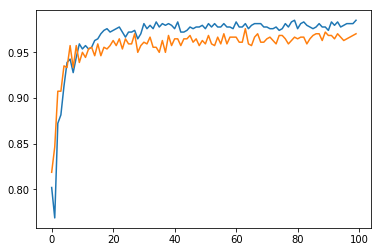

In [50]:
plt.plot(forest_score_list)
plt.plot(bagging_score_list)
plt.show()